# Estimating Average Treatment Effect (ATE)

In [109]:
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from collections import Counter

plt.style.use('ggplot')
PATH_TO_ESTIMATION_METHODS = 'estimation_methods'
sys.path.append(os.path.abspath(PATH_TO_ESTIMATION_METHODS))
np.random.seed(42)

In [110]:
from estimation_methods.utils import read_and_transform_data, bci
from estimation_methods.s_learner import calculate_measures_s_learner
from estimation_methods.t_learner import calculate_measures_t_learner
from estimation_methods.inverse_probability_weighting import calculate_measures_ipw
from estimation_methods.propensity_score_matching import calculate_measures_matching
from estimation_methods.doubly_robust import calculate_measures_doubly_robust
from estimation_methods.utils import read_and_transform_data, bci

In [111]:
DATA_DIR = 'data/processed'
age_thresholds = [20, 21, 23]
outcome_definitions = ['strict', 'inclusive']
models = ['S-Learner', 'T-Learner', 'IPW', 'PSM', 'Doubly Robust']
configurations = [(age_threshold, outcome_definition, model) for age_threshold in age_thresholds for outcome_definition in outcome_definitions for model in models]
ate_results = {configuration: 0 for configuration in configurations}
ate_results_ci = {configuration: [] for configuration in configurations}

## Covariate Adjustments

### S - Learner

In [112]:
# Iterate through all dataset configurations
for age_threshold in age_thresholds:
    for outcome_type in outcome_definitions:
        # Construct file path
        DATA_PATH = os.path.join(DATA_DIR, f"processed_age_{age_threshold}_outcome_{outcome_type}.csv")

        if os.path.exists(DATA_PATH):
            print(f"Processing: {DATA_PATH}")
            x, t, y = read_and_transform_data(DATA_PATH)

            # Compute only the ATE using the S-Learner
            s_learner_ate, _, _ = calculate_measures_s_learner(x, t, y)

            # Store the results
            ate_results[(age_threshold, outcome_type, 'S-Learner')] = s_learner_ate

            # Print the results for each configuration
            print(f'S-Learner ATE (Age >= {age_threshold}, Outcome: {outcome_type}): {s_learner_ate}')
        else:
            print(f"Warning: {DATA_PATH} not found. Skipping.")

Processing: data/processed/processed_age_20_outcome_strict.csv
S-Learner ATE (Age >= 20, Outcome: strict): -0.08067383925824813
Processing: data/processed/processed_age_20_outcome_inclusive.csv
S-Learner ATE (Age >= 20, Outcome: inclusive): -0.07200670570766919
Processing: data/processed/processed_age_21_outcome_strict.csv
S-Learner ATE (Age >= 21, Outcome: strict): -0.11339391608952502
Processing: data/processed/processed_age_21_outcome_inclusive.csv
S-Learner ATE (Age >= 21, Outcome: inclusive): -0.13777315898023176
Processing: data/processed/processed_age_23_outcome_strict.csv
S-Learner ATE (Age >= 23, Outcome: strict): -0.15982629298828968
Processing: data/processed/processed_age_23_outcome_inclusive.csv
S-Learner ATE (Age >= 23, Outcome: inclusive): -0.18249226074244354


In [113]:
# Iterate through all dataset configurations
for age_threshold in age_thresholds:
    for outcome_type in outcome_definitions:
        # Construct file path
        DATA_PATH = os.path.join(DATA_DIR, f"processed_age_{age_threshold}_outcome_{outcome_type}.csv")

        if os.path.exists(DATA_PATH):
            print(f"Processing: {DATA_PATH}")
            x, t, y = read_and_transform_data(DATA_PATH)

            # Compute ATE with bootstrap confidence interval
            s_learner_ate_ci, _, _, bootstrap_s_learner_ate, _, _ = bci(x, t, y, calculate_measures_s_learner)

            # Store the results
            ate_results_ci[(age_threshold, outcome_type, 'S-Learner')] = s_learner_ate_ci

            # Print results for each configuration
            print(f'S-Learner ATE 95% CI (Age >= {age_threshold}, Outcome: {outcome_type}): {s_learner_ate_ci}')
        else:
            print(f"Warning: {DATA_PATH} not found. Skipping.")

Processing: data/processed/processed_age_20_outcome_strict.csv
S-Learner ATE 95% CI (Age >= 20, Outcome: strict): [-0.11213038 -0.04872748]
Processing: data/processed/processed_age_20_outcome_inclusive.csv
S-Learner ATE 95% CI (Age >= 20, Outcome: inclusive): [-0.0963043  -0.04492091]
Processing: data/processed/processed_age_21_outcome_strict.csv
S-Learner ATE 95% CI (Age >= 21, Outcome: strict): [-0.14767234 -0.08187412]
Processing: data/processed/processed_age_21_outcome_inclusive.csv
S-Learner ATE 95% CI (Age >= 21, Outcome: inclusive): [-0.16347941 -0.10093518]
Processing: data/processed/processed_age_23_outcome_strict.csv
S-Learner ATE 95% CI (Age >= 23, Outcome: strict): [-0.19464585 -0.12029559]
Processing: data/processed/processed_age_23_outcome_inclusive.csv
S-Learner ATE 95% CI (Age >= 23, Outcome: inclusive): [-0.21664918 -0.1433621 ]


### T - Learner

In [114]:
# Iterate through all dataset configurations
for age_threshold in age_thresholds:
    for outcome_type in outcome_definitions:
        # Construct file path
        DATA_PATH = os.path.join(DATA_DIR, f"processed_age_{age_threshold}_outcome_{outcome_type}.csv")

        if os.path.exists(DATA_PATH):
            print(f"Processing: {DATA_PATH}")
            x, t, y = read_and_transform_data(DATA_PATH)

            # Compute only the ATE using the T-Learner
            t_learner_ate, _, _ = calculate_measures_t_learner(x, t, y)

            # Store the results
            ate_results[(age_threshold, outcome_type, 'T-Learner')] = t_learner_ate

            # Print the results for each configuration
            print(f'T-Learner ATE (Age >= {age_threshold}, Outcome: {outcome_type}): {t_learner_ate}')
        else:
            print(f"Warning: {DATA_PATH} not found. Skipping.")

Processing: data/processed/processed_age_20_outcome_strict.csv
T-Learner ATE (Age >= 20, Outcome: strict): -0.0961535373517876
Processing: data/processed/processed_age_20_outcome_inclusive.csv
T-Learner ATE (Age >= 20, Outcome: inclusive): -0.07654443757253655
Processing: data/processed/processed_age_21_outcome_strict.csv
T-Learner ATE (Age >= 21, Outcome: strict): -0.1287578844537386
Processing: data/processed/processed_age_21_outcome_inclusive.csv
T-Learner ATE (Age >= 21, Outcome: inclusive): -0.14616042486830488
Processing: data/processed/processed_age_23_outcome_strict.csv
T-Learner ATE (Age >= 23, Outcome: strict): -0.20202047932214054
Processing: data/processed/processed_age_23_outcome_inclusive.csv
T-Learner ATE (Age >= 23, Outcome: inclusive): -0.21099477857463905


In [115]:
# Iterate through all dataset configurations
for age_threshold in age_thresholds:
    for outcome_type in outcome_definitions:
        # Construct file path
        DATA_PATH = os.path.join(DATA_DIR, f"processed_age_{age_threshold}_outcome_{outcome_type}.csv")

        if os.path.exists(DATA_PATH):
            print(f"Processing: {DATA_PATH}")
            x, t, y = read_and_transform_data(DATA_PATH)

            # Compute ATE with bootstrap confidence interval
            t_learner_ate_ci, _, _, bootstrap_t_learner_ate, _, _ = bci(x, t, y, calculate_measures_t_learner)

            # Store the results
            ate_results_ci[(age_threshold, outcome_type, 'T-Learner')] = t_learner_ate_ci

            # Print results for each configuration
            print(f'T-Learner ATE 95% CI (Age >= {age_threshold}, Outcome: {outcome_type}): {t_learner_ate_ci}')
        else:
            print(f"Warning: {DATA_PATH} not found. Skipping.")

Processing: data/processed/processed_age_20_outcome_strict.csv
T-Learner ATE 95% CI (Age >= 20, Outcome: strict): [-0.14169557 -0.06556914]
Processing: data/processed/processed_age_20_outcome_inclusive.csv
T-Learner ATE 95% CI (Age >= 20, Outcome: inclusive): [-0.12698825 -0.05014678]
Processing: data/processed/processed_age_21_outcome_strict.csv
T-Learner ATE 95% CI (Age >= 21, Outcome: strict): [-0.17644937 -0.09986812]
Processing: data/processed/processed_age_21_outcome_inclusive.csv
T-Learner ATE 95% CI (Age >= 21, Outcome: inclusive): [-0.18271    -0.10911569]
Processing: data/processed/processed_age_23_outcome_strict.csv
T-Learner ATE 95% CI (Age >= 23, Outcome: strict): [-0.24727279 -0.16016422]
Processing: data/processed/processed_age_23_outcome_inclusive.csv
T-Learner ATE 95% CI (Age >= 23, Outcome: inclusive): [-0.25632191 -0.17229211]


## Propensity Based Methods

### Inverse Probability Weighting

In [116]:
# Iterate through all dataset configurations
for age_threshold in age_thresholds:
    for outcome_type in outcome_definitions:
        # Construct file path
        DATA_PATH = os.path.join(DATA_DIR, f"processed_age_{age_threshold}_outcome_{outcome_type}.csv")

        if os.path.exists(DATA_PATH):
            print(f"Processing: {DATA_PATH}")
            x, t, y = read_and_transform_data(DATA_PATH)

            # Compute only the ATE using IPW
            ipw_ate, _, _ = calculate_measures_ipw(x, t, y)

            # Store the results
            ate_results[(age_threshold, outcome_type, 'IPW')] = ipw_ate

            # Print the results for each configuration
            print(f'IPW ATE (Age >= {age_threshold}, Outcome: {outcome_type}): {ipw_ate}')
        else:
            print(f"Warning: {DATA_PATH} not found. Skipping.")

Processing: data/processed/processed_age_20_outcome_strict.csv
IPW ATE (Age >= 20, Outcome: strict): -0.05860693339229134
Processing: data/processed/processed_age_20_outcome_inclusive.csv
IPW ATE (Age >= 20, Outcome: inclusive): -0.027818243222401895
Processing: data/processed/processed_age_21_outcome_strict.csv
IPW ATE (Age >= 21, Outcome: strict): -0.20560624935817998
Processing: data/processed/processed_age_21_outcome_inclusive.csv
IPW ATE (Age >= 21, Outcome: inclusive): -0.24038574170097032
Processing: data/processed/processed_age_23_outcome_strict.csv
IPW ATE (Age >= 23, Outcome: strict): -0.31267391835172004
Processing: data/processed/processed_age_23_outcome_inclusive.csv
IPW ATE (Age >= 23, Outcome: inclusive): -0.39608565651870964


In [117]:
# Iterate through all dataset configurations
for age_threshold in age_thresholds:
    for outcome_type in outcome_definitions:
        # Construct file path
        DATA_PATH = os.path.join(DATA_DIR, f"processed_age_{age_threshold}_outcome_{outcome_type}.csv")

        if os.path.exists(DATA_PATH):
            print(f"Processing: {DATA_PATH}")
            x, t, y = read_and_transform_data(DATA_PATH)

            # Compute ATE with bootstrap confidence interval
            ipw_ate_ci, _, _, bootstrap_ipw_ate, _, _ = bci(x, t, y, calculate_measures_ipw)

            # Store the results
            ate_results_ci[(age_threshold, outcome_type, 'IPW')] = ipw_ate_ci

            # Print results for each configuration
            print(f'IPW ATE 95% CI (Age >= {age_threshold}, Outcome: {outcome_type}): {ipw_ate_ci}')
        else:
            print(f"Warning: {DATA_PATH} not found. Skipping.")

Processing: data/processed/processed_age_20_outcome_strict.csv
IPW ATE 95% CI (Age >= 20, Outcome: strict): [-0.07839554 -0.03638822]
Processing: data/processed/processed_age_20_outcome_inclusive.csv
IPW ATE 95% CI (Age >= 20, Outcome: inclusive): [-0.05327585 -0.0070369 ]
Processing: data/processed/processed_age_21_outcome_strict.csv
IPW ATE 95% CI (Age >= 21, Outcome: strict): [-0.22478508 -0.18289286]
Processing: data/processed/processed_age_21_outcome_inclusive.csv
IPW ATE 95% CI (Age >= 21, Outcome: inclusive): [-0.26237622 -0.21563762]
Processing: data/processed/processed_age_23_outcome_strict.csv
IPW ATE 95% CI (Age >= 23, Outcome: strict): [-0.32904491 -0.29031156]
Processing: data/processed/processed_age_23_outcome_inclusive.csv
IPW ATE 95% CI (Age >= 23, Outcome: inclusive): [-0.41408753 -0.37067412]


### Propensity Score Matching

In [118]:
# Iterate through all dataset configurations
for age_threshold in age_thresholds:
    for outcome_type in outcome_definitions:
        # Construct file path
        DATA_PATH = os.path.join(DATA_DIR, f"processed_age_{age_threshold}_outcome_{outcome_type}.csv")

        if os.path.exists(DATA_PATH):
            print(f"Processing: {DATA_PATH}")
            x, t, y = read_and_transform_data(DATA_PATH)

            # Compute only the ATE using PSM
            psm_ate, _, _ = calculate_measures_matching(x, t, y)

            # Store the results
            ate_results[(age_threshold, outcome_type, 'PSM')] = psm_ate

            # Print the results for each configuration
            print(f'PSM ATE (Age >= {age_threshold}, Outcome: {outcome_type}): {psm_ate}')
        else:
            print(f"Warning: {DATA_PATH} not found. Skipping.")

Processing: data/processed/processed_age_20_outcome_strict.csv
PSM ATE (Age >= 20, Outcome: strict): -0.14248195304442146
Processing: data/processed/processed_age_20_outcome_inclusive.csv
PSM ATE (Age >= 20, Outcome: inclusive): -0.13617446399992567
Processing: data/processed/processed_age_21_outcome_strict.csv
PSM ATE (Age >= 21, Outcome: strict): -0.19709713341390964
Processing: data/processed/processed_age_21_outcome_inclusive.csv
PSM ATE (Age >= 21, Outcome: inclusive): -0.0980144250359606
Processing: data/processed/processed_age_23_outcome_strict.csv
PSM ATE (Age >= 23, Outcome: strict): -0.2538187678372701
Processing: data/processed/processed_age_23_outcome_inclusive.csv
PSM ATE (Age >= 23, Outcome: inclusive): -0.2633287048828252


In [119]:
# Iterate through all dataset configurations
for age_threshold in age_thresholds:
    for outcome_type in outcome_definitions:
        # Construct file path
        DATA_PATH = os.path.join(DATA_DIR, f"processed_age_{age_threshold}_outcome_{outcome_type}.csv")

        if os.path.exists(DATA_PATH):
            print(f"Processing: {DATA_PATH}")
            x, t, y = read_and_transform_data(DATA_PATH)

            # Compute ATE with bootstrap confidence interval
            psm_ate_ci, _, _, bootstrap_psm_ate, _, _ = bci(x, t, y, calculate_measures_matching)

            # Store the results
            ate_results_ci[(age_threshold, outcome_type, 'PSM')] = psm_ate_ci

            # Print results for each configuration
            print(f'PSM ATE 95% CI (Age >= {age_threshold}, Outcome: {outcome_type}): {psm_ate_ci}')
        else:
            print(f"Warning: {DATA_PATH} not found. Skipping.")

Processing: data/processed/processed_age_20_outcome_strict.csv
PSM ATE 95% CI (Age >= 20, Outcome: strict): [-0.2059462   0.17288203]
Processing: data/processed/processed_age_20_outcome_inclusive.csv
PSM ATE 95% CI (Age >= 20, Outcome: inclusive): [-0.19578476  0.15324533]
Processing: data/processed/processed_age_21_outcome_strict.csv
PSM ATE 95% CI (Age >= 21, Outcome: strict): [-0.30213103  0.09017438]
Processing: data/processed/processed_age_21_outcome_inclusive.csv
PSM ATE 95% CI (Age >= 21, Outcome: inclusive): [-0.29704038  0.05667493]
Processing: data/processed/processed_age_23_outcome_strict.csv
PSM ATE 95% CI (Age >= 23, Outcome: strict): [-0.44176736 -0.05015727]
Processing: data/processed/processed_age_23_outcome_inclusive.csv
PSM ATE 95% CI (Age >= 23, Outcome: inclusive): [-0.41811532 -0.01295198]


## Doubly Robust

In [120]:
# Iterate through all dataset configurations
for age_threshold in age_thresholds:
    for outcome_type in outcome_definitions:
        # Construct file path
        DATA_PATH = os.path.join(DATA_DIR, f"processed_age_{age_threshold}_outcome_{outcome_type}.csv")

        if os.path.exists(DATA_PATH):
            print(f"Processing: {DATA_PATH}")
            x, t, y = read_and_transform_data(DATA_PATH)

            # Compute only the ATE using Doubly Robust
            dr_ate, _, _ = calculate_measures_doubly_robust(x, t, y)

            # Store the results
            ate_results[(age_threshold, outcome_type, 'Doubly Robust')] = dr_ate

            # Print the results for each configuration
            print(f'Doubly Robust ATE (Age >= {age_threshold}, Outcome: {outcome_type}): {dr_ate}')
        else:
            print(f"Warning: {DATA_PATH} not found. Skipping.")

Processing: data/processed/processed_age_20_outcome_strict.csv
Doubly Robust ATE (Age >= 20, Outcome: strict): -0.09945953438552729
Processing: data/processed/processed_age_20_outcome_inclusive.csv
Doubly Robust ATE (Age >= 20, Outcome: inclusive): -0.06315125310824432
Processing: data/processed/processed_age_21_outcome_strict.csv
Doubly Robust ATE (Age >= 21, Outcome: strict): -0.14721932246327757
Processing: data/processed/processed_age_21_outcome_inclusive.csv
Doubly Robust ATE (Age >= 21, Outcome: inclusive): -0.12379891314870717
Processing: data/processed/processed_age_23_outcome_strict.csv
Doubly Robust ATE (Age >= 23, Outcome: strict): -0.2601591232430755
Processing: data/processed/processed_age_23_outcome_inclusive.csv
Doubly Robust ATE (Age >= 23, Outcome: inclusive): -0.23557950919004988


In [121]:
# Iterate through all dataset configurations
for age_threshold in age_thresholds:
    for outcome_type in outcome_definitions:
        # Construct file path
        DATA_PATH = os.path.join(DATA_DIR, f"processed_age_{age_threshold}_outcome_{outcome_type}.csv")

        if os.path.exists(DATA_PATH):
            print(f"Processing: {DATA_PATH}")
            x, t, y = read_and_transform_data(DATA_PATH)

            # Compute ATE with bootstrap confidence interval
            dr_ate_ci, _, _, bootstrap_dr_ate, _, _ = bci(x, t, y, calculate_measures_doubly_robust)

            # Store the results
            ate_results_ci[(age_threshold, outcome_type, 'Doubly Robust')] = dr_ate_ci

            # Print results for each configuration
            print(f'Doubly Robust ATE 95% CI (Age >= {age_threshold}, Outcome: {outcome_type}): {dr_ate_ci}')
        else:
            print(f"Warning: {DATA_PATH} not found. Skipping.")

Processing: data/processed/processed_age_20_outcome_strict.csv
Doubly Robust ATE 95% CI (Age >= 20, Outcome: strict): [-0.18291656 -0.05677452]
Processing: data/processed/processed_age_20_outcome_inclusive.csv
Doubly Robust ATE 95% CI (Age >= 20, Outcome: inclusive): [-0.1345062  -0.02908434]
Processing: data/processed/processed_age_21_outcome_strict.csv
Doubly Robust ATE 95% CI (Age >= 21, Outcome: strict): [-0.22262693 -0.10639188]
Processing: data/processed/processed_age_21_outcome_inclusive.csv
Doubly Robust ATE 95% CI (Age >= 21, Outcome: inclusive): [-0.17531483 -0.07438542]
Processing: data/processed/processed_age_23_outcome_strict.csv
Doubly Robust ATE 95% CI (Age >= 23, Outcome: strict): [-0.33464984 -0.19834365]
Processing: data/processed/processed_age_23_outcome_inclusive.csv
Doubly Robust ATE 95% CI (Age >= 23, Outcome: inclusive): [-0.31882298 -0.16657748]


## Saving the Results

In [122]:
# Convert dictionary to a list of tuples for DataFrame creation
data = [
    (age, outcome, model, ate, ci[0], ci[1]) 
    for (age, outcome, model), ate in ate_results.items()
    for ci in [ate_results_ci.get((age, outcome, model), [None, None])]
]

# Create DataFrame with separate columns for each tuple element and confidence interval bounds
df_ate_results = pd.DataFrame(data, columns=["Age Threshold", "Outcome Type", "Model", "ATE", "CI Lower", "CI Upper"])
df_ate_results = df_ate_results.round(4)

# Save to CSV file
csv_file_path = "results/ate_results_with_ci.csv"
df_ate_results.to_csv(csv_file_path, index=False)

print(f"ATE results with confidence intervals saved to {csv_file_path}")

ATE results with confidence intervals saved to results/ate_results_with_ci.csv


## Plot of the Results

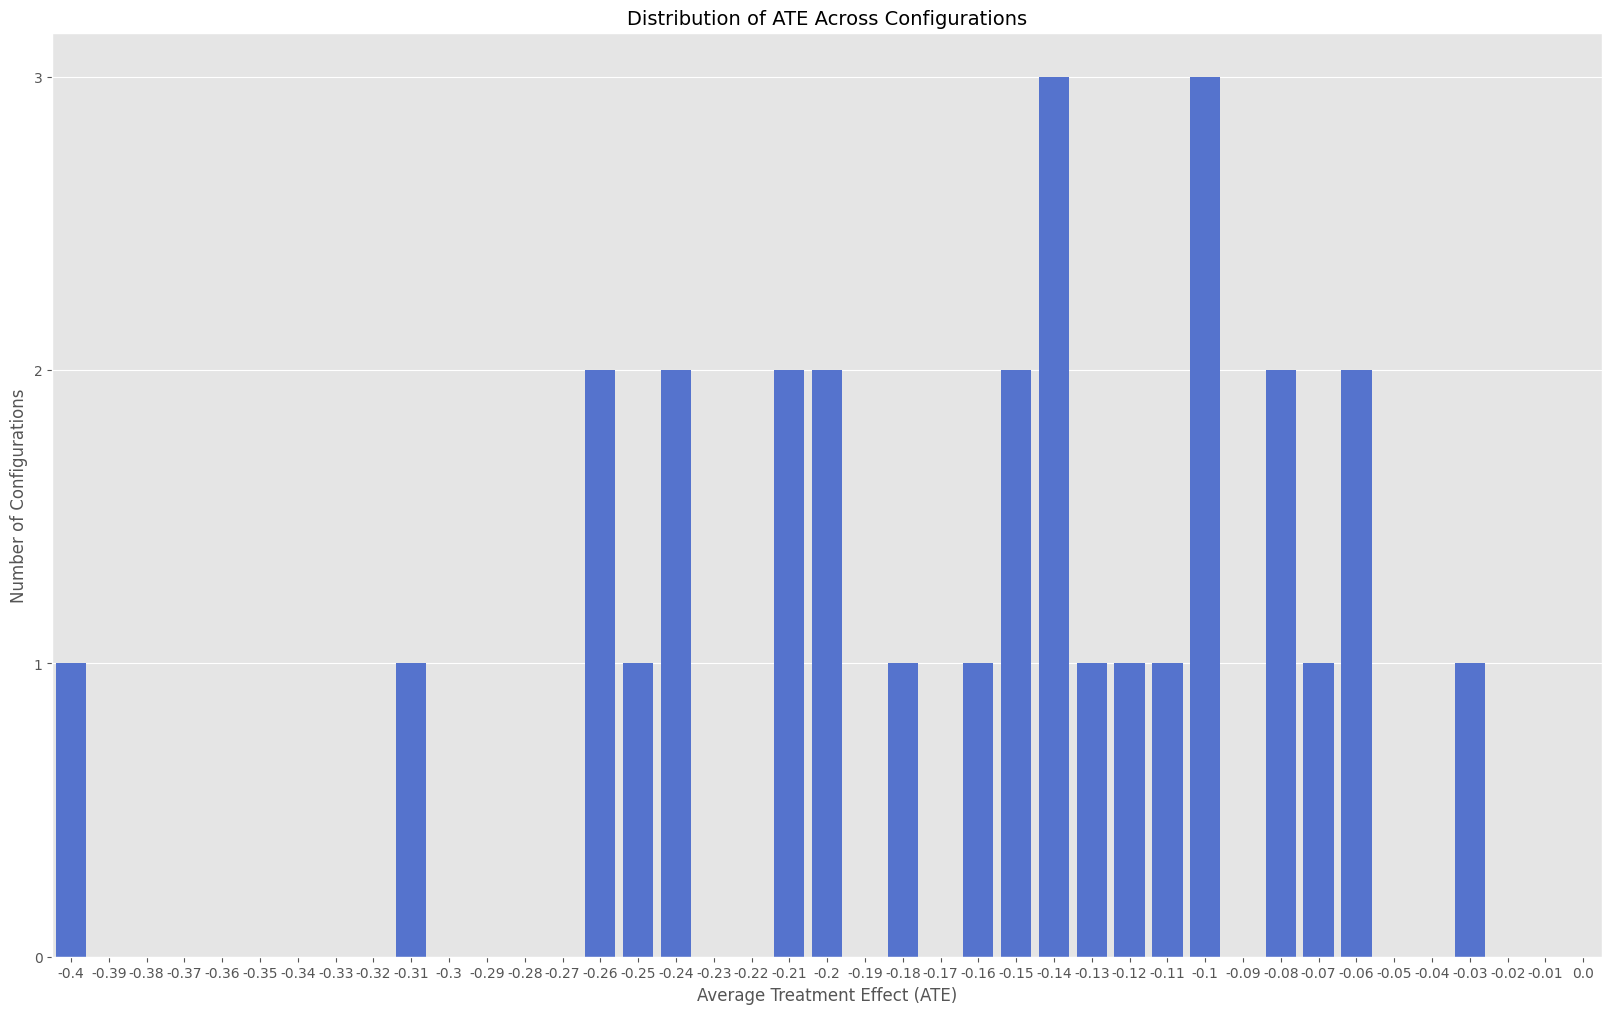

In [123]:
# Extract ATE values
ate_values = list(ate_results.values())
ate_values = [round(ate, 2) for ate in ate_values]

# Count occurrences of each ATE
ate_counts = Counter(ate_values)

# Convert to lists for plotting
unique_ates = list(ate_counts.keys())
counts = list(ate_counts.values())

# Add missing ATE values
ate_range = np.round(np.arange(-0.4, 0.01, 0.01), 2)
for ate in ate_range:
    if ate not in unique_ates:
        unique_ates.append(ate)
        counts.append(0)

# Plot the bar chart
plt.figure(figsize=(20, 12))
sns.barplot(x=unique_ates, y=counts, color="royalblue")

# Labels and title
plt.xlabel("Average Treatment Effect (ATE)", fontsize=12)
plt.ylabel("Number of Configurations", fontsize=12)
plt.title("Distribution of ATE Across Configurations", fontsize=14)

plt.yticks([0, 1, 2, 3])

# Show the plot
plt.show()